In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

## Dataset

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code

In [2]:
# Read the CSV file, specifying column names and "?" as missing values
wine_data = pd.read_csv("winequality-red.csv")

# Display the first few rows of the DataFrame
# Drop last column, nothing useful within
display(wine_data.head())
# List Atrributes
attributes = wine_data.columns.to_list()
attributes.remove("quality")
print(attributes)
# Find Spread between quality
print(wine_data["quality"].value_counts())

# Check for missing data
missing_data = wine_data.isnull().sum()

# Print columns with missing data
print("Columns with missing data:")
print(missing_data[missing_data > 0].tolist())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
Columns with missing data:
[]


## Categorize
Put wine quality into two categories good or bad

- low (0): quality in range 0-4

- medium (.5): quality in ragne 4-6

- high (1): quality in range 6-10

In [3]:
# Define quality categories
# You can adjust the boundaries as per your preference
bins = [0, 6.5, 10]
labels = [0, 1]

# Categorize quality into classes
wine_data['quality_category'] = pd.cut(wine_data['quality'], bins=bins, labels=labels)

# Display the first few rows of the DataFrame with the new category column
wine_data.drop('quality', axis = 1, inplace = True)
display(wine_data.head())
# Find Spread between quality_category
target = "quality_category"
print(wine_data["quality_category"].value_counts())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


quality_category
0    1382
1     217
Name: count, dtype: int64


In [4]:
# Step 1: Split the dataset into features and target variable
X = wine_data.drop(columns=[target])
y = wine_data[target]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression and SVM models
logistic_regression_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

logistic_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Step 4: Evaluate the models using the testing data
logistic_regression_predictions = logistic_regression_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Step 5: Calculate accuracy scores to obtain a baseline
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print baseline accuracy scores
print("Logistic Regression Baseline Accuracy:", logistic_regression_accuracy)
print("SVM Baseline Accuracy:", svm_accuracy)


Logistic Regression Baseline Accuracy: 0.859375
SVM Baseline Accuracy: 0.85625


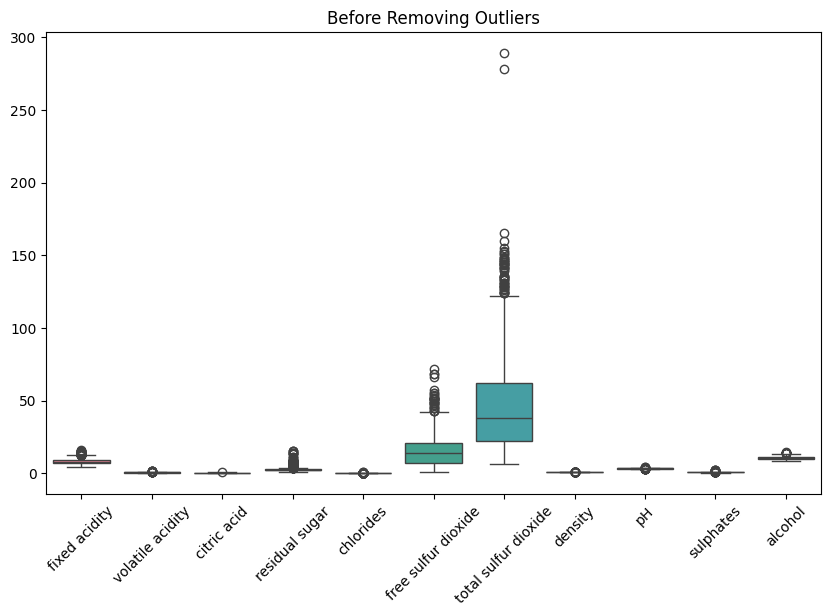

# of outliers removed:  141


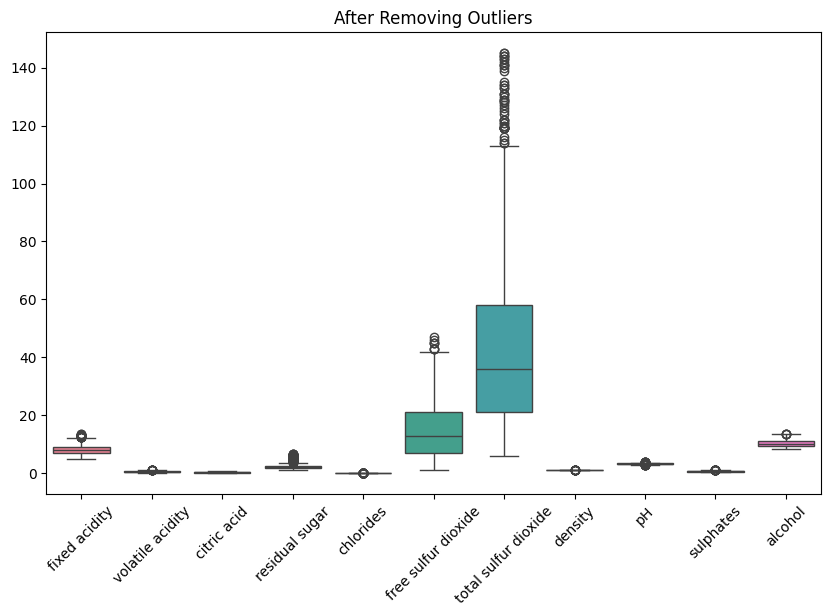

In [5]:
# Define function to plot boxplot
def plot_boxplot(data, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Suppress future warnings related to grouping
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot boxplot before removing outliers
plot_boxplot((wine_data), title="Before Removing Outliers")

prelen = len(wine_data)
# Select only numeric columns
numeric_columns = wine_data.select_dtypes(include=[np.number])
# Calculate Z-scores for each column
z_scores = stats.zscore(numeric_columns)
# Define the threshold dynamically to capture the top 1% of outliers
threshold = np.percentile(np.abs(z_scores), 99)
# Find indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)
# Remove outliers
wine_data = wine_data[(np.abs(z_scores) < threshold).all(axis=1)]
print("# of outliers removed: ", prelen - len(wine_data))

# Plot boxplot after removing outliers
plot_boxplot(wine_data, title="After Removing Outliers")

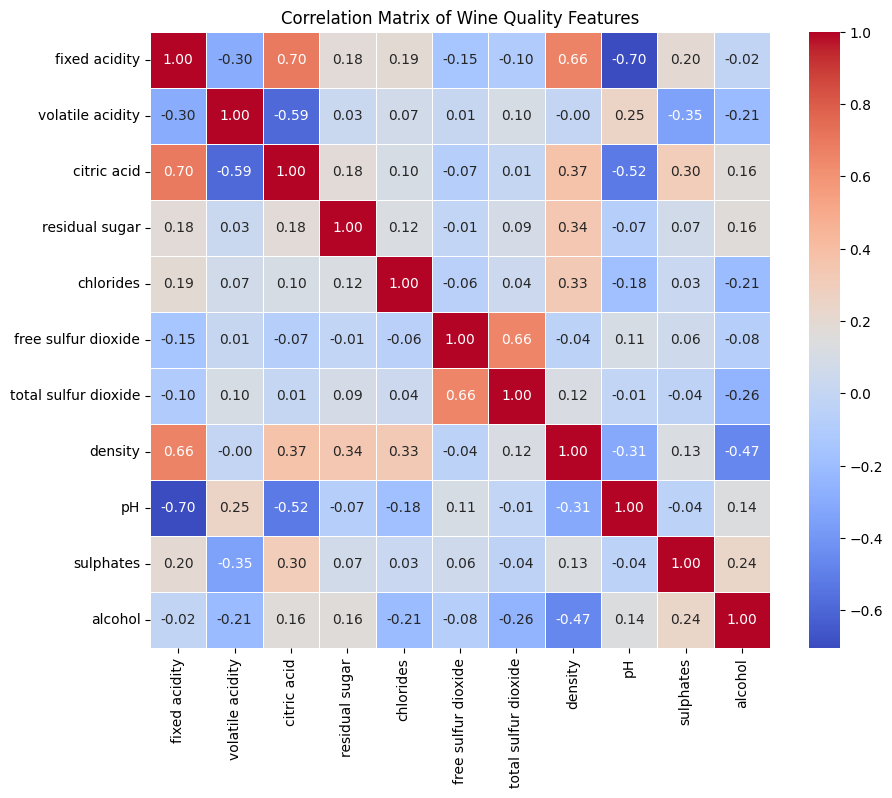

In [6]:
# Calculate the correlation matrix
correlation_matrix = wine_data.drop(columns=[target]).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wine Quality Features')
plt.show()

### High Correleations
May need to do something with them later help model accuracy
- ph & fixed acidity ~ -.71
- citric acid & fixed acidity ~ .70
- citric acid & volatile acidity ~ -.59
- density & fixed acidityy ~ .66
- total sulfer dioxide & free sulfure dioxide ~ .66


In [7]:
# Step 1: Split the dataset into features and target variable
X = wine_data.drop(columns=[target])
y = wine_data[target]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train logistic regression and SVM models on standardized data
logistic_regression_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

logistic_regression_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Evaluate the models using the testing data
logistic_regression_predictions = logistic_regression_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

# Step 6: Calculate accuracy scores to obtain a baseline
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print baseline accuracy scores
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("SVM Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.9041095890410958
SVM Accuracy: 0.9075342465753424
